In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.data.shape

(569, 30)

In [2]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=62)
prediction = kmeans.fit_predict(data.data)
print(prediction)

kmeans.cluster_centers_.shape
print(kmeans.cluster_centers_)

[7 7 1 0 1 6 1 6 6 6 2 4 4 2 6 2 2 4 5 6 0 8 2 5 7 4 2 4 4 4 1 6 4 7 4 4 6
 0 6 6 6 0 1 6 6 1 8 6 0 6 0 6 0 4 2 0 7 2 0 8 8 8 2 8 6 2 8 0 8 0 7 8 1 6
 0 4 0 1 1 0 0 0 3 4 0 1 6 1 0 6 6 2 6 6 2 7 0 8 0 6 2 8 0 8 8 6 0 0 5 0 8
 0 6 8 8 0 8 2 4 4 0 1 5 6 6 6 6 1 6 1 0 2 4 2 1 6 0 0 2 0 8 4 0 6 8 0 0 6
 6 6 0 8 8 0 6 0 4 2 0 0 0 1 5 0 5 6 8 4 1 6 0 2 2 8 8 8 8 2 0 0 3 7 4 0 2
 8 4 0 0 0 6 0 8 6 6 0 6 4 1 2 0 4 5 2 6 2 8 4 6 2 1 0 3 2 6 6 0 8 7 5 6 6
 8 2 6 2 8 6 0 6 4 0 0 7 8 6 3 7 6 4 6 0 0 6 1 8 0 0 8 0 7 0 7 4 7 6 7 2 4
 2 7 4 4 2 4 3 8 6 0 8 6 0 5 8 4 0 0 4 6 6 1 0 1 2 0 0 0 0 0 0 6 6 0 0 0 6
 8 0 6 8 7 0 1 8 0 0 6 8 6 6 0 6 0 0 8 0 0 1 8 0 8 1 0 7 0 0 6 0 2 2 2 0 0
 0 0 4 0 7 8 3 6 8 0 1 0 8 0 2 0 0 0 2 3 2 0 0 0 6 8 8 0 6 0 2 6 7 1 0 3 5
 4 6 1 7 6 2 8 6 6 0 0 0 0 0 6 6 0 6 0 4 8 8 4 5 0 6 6 0 0 0 4 0 0 0 0 0 2
 6 4 0 0 0 8 2 2 0 8 1 0 0 0 6 0 6 8 8 8 0 8 0 6 0 1 1 6 6 0 6 6 6 0 4 6 8
 4 0 4 6 6 7 0 1 0 6 0 6 0 6 0 8 1 9 6 0 6 6 6 8 4 0 8 0 2 0 8 0 6 6 0 2 0
 6 6 6 2 0 6 1 0 2 0 4 4 

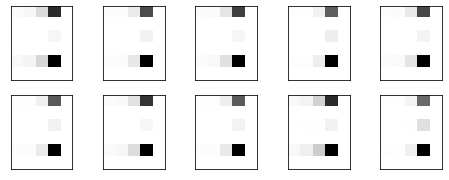

In [4]:
# Scatter plot of the data points
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 6, 5)
for axi, center in zip(ax.flat, centers):
  axi.set(xticks=[], yticks=[])
  axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [5]:
labels = np.zeros_like(prediction)
for i in range(10):
  mask = (prediction == i)
  labels[mask] = mode(data.target[mask])[0]

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(data.target, labels)

0.9050966608084359